### Testing the models on some images
#### Performing a license plate `Detection` And `Recognition` task using the models we had trained.

In [1]:
!pip install ultralytics --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.1/922.1 kB 37.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 88.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 65.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 44.4 MB/s eta 0:00:00


In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

### Detecting plate and its keypoints using our trained yolov8n-pose.pt model

In [3]:
!gdown 1NvXiHn0OW7MN44GZ4JCBWWwtZjJVkVGQ

Downloading...
From: https://drive.google.com/uc?id=1NvXiHn0OW7MN44GZ4JCBWWwtZjJVkVGQ
To: /content/plate_keypoints_detector.pt
100% 6.41M/6.41M [00:00<00:00, 58.1MB/s]


In [4]:
!gdown 1HHUwzRRCdLyjAusTFzB0oAsZVn8_5N1l

Downloading...
From: https://drive.google.com/uc?id=1HHUwzRRCdLyjAusTFzB0oAsZVn8_5N1l
To: /content/20240425_082950.JPG
100% 469k/469k [00:00<00:00, 40.0MB/s]


In [5]:
from ultralytics import YOLO

# loading our trained model
model = YOLO('plate_keypoints_detector.pt')

# perform prediction on an image
results = model('/content/20240425_082950.JPG')

# access keypoints
for result in results:
    print(result.keypoints.xy.cpu().numpy())

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.

image 1/1 /content/20240425_082950.JPG: 640x480 1 license_plate, 357.8ms
Speed: 19.6ms preprocess, 357.8ms inference, 31.1ms postprocess per image at shape (1, 3, 640, 480)
[[[     532.65      837.66]
  [     672.01      856.26]
  [     669.38      888.97]
  [     530.02       868.3]]]


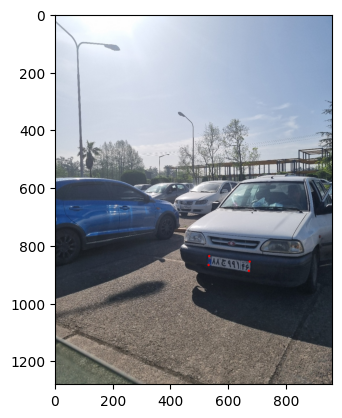

In [6]:
import cv2
original_test_image = cv2.imread('/content/20240425_082950.JPG')
img = original_test_image.copy()
# img = cv2.resize(img, (640,640))
keyps = result.keypoints.xy.cpu().numpy().astype('int32')[0]
cv2.circle(img, (keyps[0,0],keyps[0,1]), 4, (0,0,255), -1)
cv2.circle(img, (keyps[1,0],keyps[1,1]), 4, (0,0,255), -1)
cv2.circle(img, (keyps[2,0],keyps[2,1]), 4, (0,0,255), -1)
cv2.circle(img, (keyps[3,0],keyps[3,1]), 4, (0,0,255), -1)

plt.imshow(img[...,::-1])

___

#### Perspective Transform

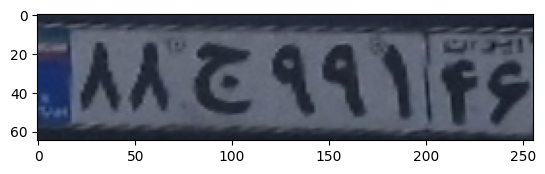

In [7]:
img2 = original_test_image.copy()

plate_corners = np.float32([
    [keyps[0,0],keyps[0,1]-5],  # Top-left
    [keyps[1,0],keyps[1,1]-5],  # Top-right
    [keyps[2,0],keyps[2,1]+5],  # Bottom-right
    [keyps[3,0],keyps[3,1]+5]   # Bottom-left
])

dst_points = np.float32([
    [0, 0],           # Top-left
    [256 -1, 0],     # Top-right
    [256 - 1, 65 - 1], # Bottom-right
    [0, 65 - 1]       # Bottom-left
])

M = cv2.getPerspectiveTransform(plate_corners, dst_points)

# apply the perspective transformation
transformed_plate = cv2.warpPerspective(img2, M, (256, 65))
plt.imshow(transformed_plate[...,::-1])

### Plate Recognition using our trained keras model

In [8]:
!gdown 1wyM47vcu7x-ZWD1qErO4F4JpWTpBtzhp

Downloading...
From: https://drive.google.com/uc?id=1wyM47vcu7x-ZWD1qErO4F4JpWTpBtzhp
To: /content/license_plate_recognition.keras
100% 6.61M/6.61M [00:00<00:00, 41.4MB/s]


In [9]:
loaded_model = tf.keras.models.load_model('license_plate_recognition.keras')

In [10]:
characters = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'H', 'J', 'K', 'L', 'M', 'N', 'S', 'T', 'V', 'X', 'Y', 'Z']

In [11]:
# Mapping characters to integers
char_to_num = layers.StringLookup(
    vocabulary=list(characters), mask_token=None
)

# Mapping integers back to original characters
num_to_char = layers.StringLookup(
    vocabulary=char_to_num.get_vocabulary(), mask_token=None, invert=True
)

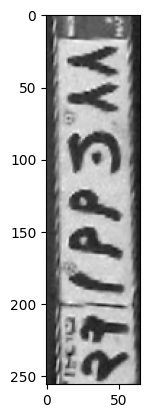

In [12]:
img = transformed_plate.copy()

img = tf.convert_to_tensor(img, dtype=tf.float32)
img = img / 255.0
img = tf.image.rgb_to_grayscale(img)
img = tf.image.resize(img, [65, 256])
img = tf.transpose(img, perm=[1, 0, 2])
plt.imshow(tf.squeeze(img), cmap='gray')
plt.show()

In [13]:
img = img[np.newaxis,...]
img.shape

TensorShape([1, 256, 65, 1])

In [14]:
preds = loaded_model.predict(img, verbose=0)
preds = preds.argmax(axis=-1)
pred_texts = []
for p in preds:
    label = tf.strings.reduce_join(num_to_char(p)).numpy().decode("utf-8")
    pred_texts.append(label)

pred_texts[0]

'88J99146'

___

___

### Writing a straight-forward function for this task

In [61]:
# writing a straight-forward function for license plate detection and recognitio

characters = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'H', 'J', 'K', 'L', 'M', 'N', 'S', 'T', 'V', 'X', 'Y', 'Z']

# Mapping characters to integers
char_to_num = layers.StringLookup(
    vocabulary=list(characters), mask_token=None
)

# Mapping integers back to original characters
num_to_char = layers.StringLookup(
    vocabulary=char_to_num.get_vocabulary(), mask_token=None, invert=True
)

def plate_detection_and_recognition(img_path):
    results = model(img_path)

    # 1- Keypoint Detection
    original_test_image = cv2.imread(img_path)
    img = original_test_image.copy()

    for result in results:
        keyps = result.keypoints.xy.cpu().numpy().astype('int32')[0]


    # 2 - Perspective transformation
    plate_corners = np.float32([
        [keyps[0,0],keyps[0,1]-5],  # Top-left
        [keyps[1,0],keyps[1,1]-5],  # Top-right
        [keyps[2,0],keyps[2,1]+5],  # Bottom-right
        [keyps[3,0],keyps[3,1]+5]   # Bottom-left
    ])

    dst_points = np.float32([
        [0, 0],           # Top-left
        [256 -1, 0],     # Top-right
        [256 - 1, 65 - 1], # Bottom-right
        [0, 65 - 1]       # Bottom-left
    ])

    M = cv2.getPerspectiveTransform(plate_corners, dst_points)
    transformed_plate = cv2.warpPerspective(img, M, (256, 65))
    trp = transformed_plate.copy()

    # 3 - Preprocessing plate for recognition task
    trp = tf.convert_to_tensor(trp, dtype=tf.float32)
    trp = trp / 255.0
    trp = tf.image.rgb_to_grayscale(trp)
    trp = tf.image.resize(trp, [65, 256])
    trp = tf.transpose(trp, perm=[1, 0, 2])
    trp = trp[np.newaxis,...]

    preds = loaded_model.predict(trp, verbose=0)
    preds = preds.argmax(axis=-1)
    pred_texts = []
    for p in preds:
        label = tf.strings.reduce_join(num_to_char(p)).numpy().decode("utf-8")
        pred_texts.append(label)

    # 4- drawing a quadrilateral around the plate, and write the number above it
    points = np.array([[keyps[0,0],keyps[0,1]], [keyps[1,0],keyps[1,1]], [keyps[2,0],keyps[2,1]], [keyps[3,0],keyps[3,1]]], np.int32)
    points = points.reshape((-1, 1, 2))
    cv2.polylines(img, [points], isClosed=True, color=(255, 10, 255), thickness=2)

    points = np.array([[keyps[0,0],keyps[0,1]], [keyps[1,0],keyps[1,1]], [keyps[1,0],np.min([keyps[0,1],keyps[1,1]])-30], [keyps[0,0], np.min([keyps[0,1],keyps[1,1]])-30]], np.int32)
    points = points.reshape((-1, 1, 2))
    cv2.fillPoly(img, [points], color=(255, 10, 255))

    text = pred_texts[0]
    position = (keyps[0,0],np.min([keyps[0,1],keyps[1,1]]))  # Bottom-left corner of the text
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 0.8

    # cv2.putText(img, text, position, font, font_scale, (255,255,255), 4) #this acts like shadow
    cv2.putText(img, text, position, font, font_scale, (0,0,50), 2)


    img[5:70,5:261]= transformed_plate
    cv2.rectangle(img, [5,5], [261,70], (255,10,255), 2)

    plt.imshow(img[...,::-1])

    return pred_texts[0]


image 1/1 /content/20240425_082950.JPG: 640x480 1 license_plate, 337.9ms
Speed: 4.6ms preprocess, 337.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


'88J99146'

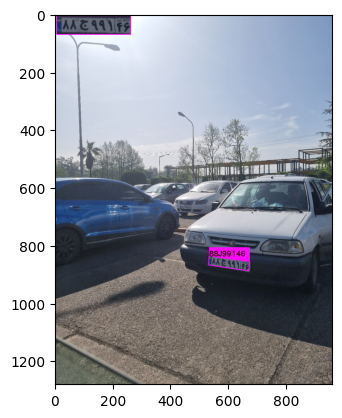

In [62]:
plate_detection_and_recognition('/content/20240425_082950.JPG')

#### Testing other images


image 1/1 /content/20240425_090155.JPG: 640x480 1 license_plate, 229.9ms
Speed: 6.8ms preprocess, 229.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


'37Y28646'

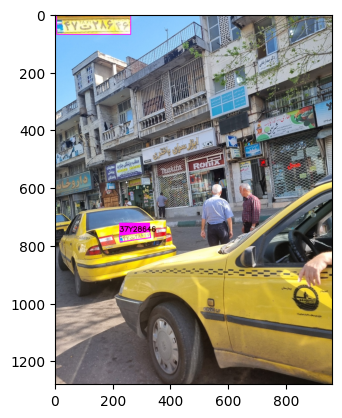

In [63]:
plate_detection_and_recognition('/content/20240425_090155.JPG')


image 1/1 /content/20240425_083018.JPG: 640x480 1 license_plate, 221.0ms
Speed: 4.0ms preprocess, 221.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


'2L5L4466'

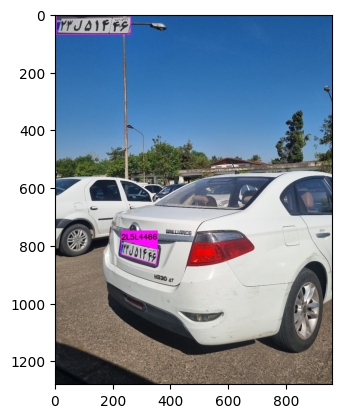

In [64]:
plate_detection_and_recognition('/content/20240425_083018.JPG')


image 1/1 /content/20240425_082841.JPG: 640x480 1 license_plate, 216.7ms
Speed: 4.6ms preprocess, 216.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


'58H54146'

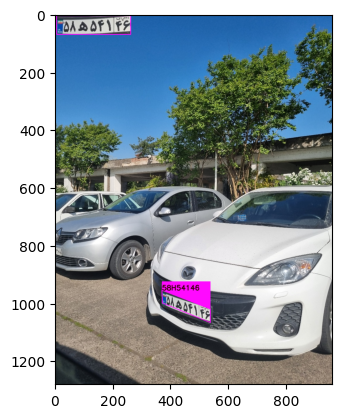

In [65]:
plate_detection_and_recognition('/content/20240425_082841.JPG')


image 1/1 /content/test_plate_2.jpg: 640x640 1 license_plate, 267.6ms
Speed: 6.4ms preprocess, 267.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


'31C63777'

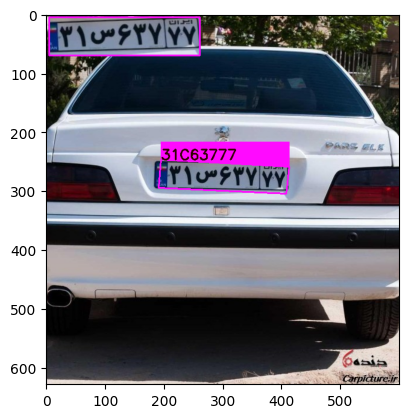

In [66]:
plate_detection_and_recognition('test_plate_2.jpg')


image 1/1 /content/test_plate_3.jpg: 416x640 1 license_plate, 286.8ms
Speed: 4.2ms preprocess, 286.8ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 640)


'91C29877'

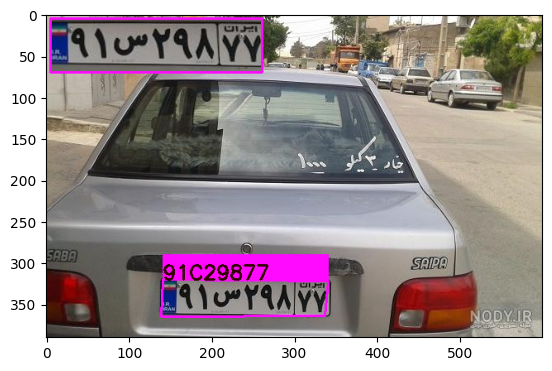

In [67]:
plate_detection_and_recognition('test_plate_3.jpg')


image 1/1 /content/test_plate_4.jpg: 448x640 1 license_plate, 315.2ms
Speed: 4.4ms preprocess, 315.2ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)


'18X26744'

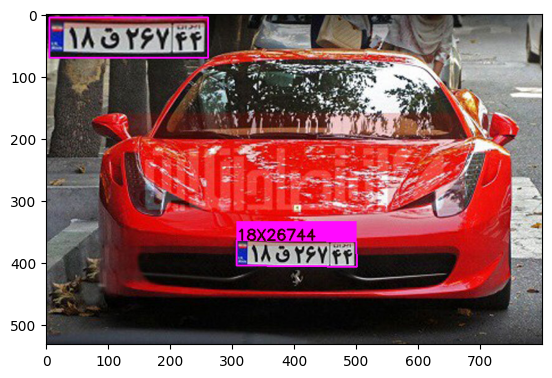

In [68]:
plate_detection_and_recognition('test_plate_4.jpg')